# A Tutorial on Implementing Optical Character Recognition (OCR) in Python

## Why learn Optical Character Recognition (OCR)?

## Top Open-source OCR Libraries in Python

Since OCR is a popular ongoing problem, there are many open-source libraries that try to solve it. In this section, we will cover the ones that gained the most popularity due to their high performance and accuracy. 

### Tesseract

Tesseract OCR is an open-source optical character recognition engine that is the most popular among developers. Like other tools in this list, Tesseract can take images of text and convert them into editable text. Here are its main advantages and disadvantages:

- Advantages:
    - Widely used and mature library with a large community.
    - Supports over 100 languages.
    - Free and open-source.
- Disadvantages:
    - Accuracy can be lower compared to some deep learning-based solutions.
    - Limited configuration options.

### Easy OCR

EasyOCR is a Python library designed for effortless Optical Character Recognition (OCR). It lives up to its name by offering a user-friendly approach to text extraction from images. Here's a breakdown of EasyOCR's advantages and disadvantages:

- Advantages:
    - User-friendly and easy to set up.
    - High accuracy with deep learning models.
    - Supports various languages out-of-the-box.
- Disadvantages:
    - Reliant on pre-trained models which can be large in size.
    - Might be slower than Tesseract for simpler tasks.

### Keras OCR

Keras-OCR is a Python library built on top of Keras, a popular deep learning framework. It provides out-of-the-box OCR models and an end-to-end training pipeline to build new OCR models. Here are its pros and cons:

- Advantages:
    - Deep learning-based approach offering high accuracy for various text types.
    - Customizable model selection and training.
    - Can be more accurate on complex layouts or handwritten text.
- Disadvantages:
    - Requires GPU for optimal performance.
    - Steeper learning curve due to its deep learning nature.
    - Training custom models can be time-consuming.
 
----------------------

Here is table summarizing their differences, advantages and disadvantages:

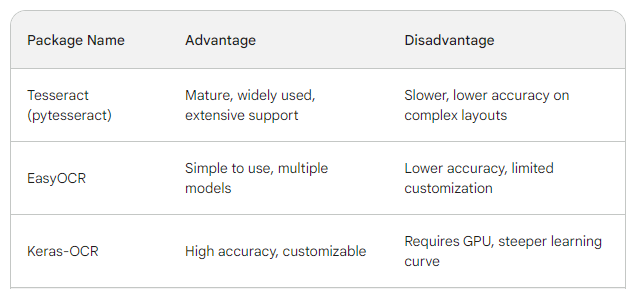

In this tutorial, we will focus on PyTesseract, which is Tesseract's Python API. We will learn how to extract text from simple images and then move on to more complex scenarios where we need to perform image processing to get the most optimal results.

## A Step-by-step Guide to OCR with PyTesseract & OpenCV

### Installation

```bash
$ conda create -n ocr python==3.9 -y
$ conda activate ocr
$ pip install pytesseract ipykernel
$ ipython kernel install --user --name=ocr
```

## Case study: OCR on a PDF file with Python

## Conclusion